# Temperature Forecast Project

Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

In [47]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

#sklearn imports
from sklearn.model_selection import train_test_split # split the dataset
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler # Scalers 

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 

from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [30]:
#Importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [31]:
df.apply(pd.isnull).sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [32]:
#Checking null value
null_percent = df.apply(pd.isnull).sum()/weather_df.shape[0]
null_percent

station             0.000258
Date                0.000258
Present_Tmax        0.009030
Present_Tmin        0.009030
LDAPS_RHmin         0.009675
LDAPS_RHmax         0.009675
LDAPS_Tmax_lapse    0.009675
LDAPS_Tmin_lapse    0.009675
LDAPS_WS            0.009675
LDAPS_LH            0.009675
LDAPS_CC1           0.009675
LDAPS_CC2           0.009675
LDAPS_CC3           0.009675
LDAPS_CC4           0.009675
LDAPS_PPT1          0.009675
LDAPS_PPT2          0.009675
LDAPS_PPT3          0.009675
LDAPS_PPT4          0.009675
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
Next_Tmax           0.003483
Next_Tmin           0.003483
dtype: float64

Action:
since we have varied null value percentages, we only retain columns with less than 5% (ie 0.05)

In [33]:
# Create a valid columns that will only contain columns with null value less than 5%
valid_col = df.columns[null_percent<0.05]
valid_col

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

These are columns with less than 5% null values and to be kept

In [34]:
#Change our dataFrame to retain these columns
df1 = df[valid_col].copy()
df1

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [35]:
df1.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [36]:
# fill the missing values in the valid columns using ffill function
df1 = df1.ffill()

In [9]:
#Checking the null values again and verify the action
weather_df.apply(pd.isnull).sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Take-away:
There is no missing value in the dataset now

In [37]:
df1.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [38]:
# covert Date column into separate columns of dd mm yyyy
# Split into three elements of day, month and year
df1['Date'][0].split('-')

['30', '06', '2013']

It shows the first row of date column in the dataset.

In [40]:
year = []
month = []
day = []

# sort day, month and year in different list for vizualization and processing purposes

for i in df1['Date']:
    try :
        split_obj = i.split('-')
        year.append(split_obj[2])
        month.append(split_obj[1])    
        day.append(split_obj[0]) 
        
    except AttributeError:
        year.append(np.nan)
        month.append(np.nan)
        day.append(np.nan)

In [41]:
# insert new Date splits into the DataFrame as year, Month and day
df1['year'] = year
df1['month'] = month
df1['day'] = day

In [42]:
# covert the new columns from object into numeric datatype
df1['year'] = pd.to_numeric(df1['year']) 
df1['month'] = pd.to_numeric(df1['month']) 
df1['day'] = pd.to_numeric(df1['day'])

In [43]:
# Droping Date column now, as its not required again
df1.drop('Date', axis=1, inplace=True)

In [66]:
#Droping station column 
df1.drop('station', axis=1, inplace=True)

In [67]:
#Checking the Dataframe for those changes
df1.head()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0          28.7          21.4    58.255688    91.116364         28.074101   
1          31.9          21.6    52.263397    90.604721         29.850689   
2          31.6          23.3    48.690479    83.973587         30.091292   
3          32.0          23.4    58.239788    96.483688         29.704629   
4          31.4          21.9    56.174095    90.155128         29.113934   

   LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...      lat  \
0         23.006936  6.818887   69.451805   0.233947   0.203896  ...  37.6046   
1         24.035009  5.691890   51.937448   0.225508   0.251771  ...  37.6046   
2         24.565633  6.138224   20.573050   0.209344   0.257469  ...  37.5776   
3         23.326177  5.650050   65.727144   0.216372   0.226002  ...  37.6450   
4         23.486480  5.735004  107.965535   0.151407   0.249995  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  year  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2  2013   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5  2013   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9  2013   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3  2013   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5  2013   

   month  day  
0      6   30  
1      6   30  
2      6   30  
3      6   30  
4      6   30  

[5 rows x 26 columns]

# Exploratory Data Analyis - EDA

Visualize a day temperature values(ie Tmax and Tmin)

In [64]:
def plot_line(para):
    df2 = df1.groupby(by=para).mean().reset_index()
    
    fig = px.line(df2, x=df2[para], y=['Present_Tmax', 'Present_Tmin'])
    fig.update_layout(template='seaborn')
    return fig.show()

In [65]:
plot_line('day')

In [69]:
# Correlations
df1.corr()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Present_Tmax          1.000000      0.618556    -0.204582    -0.308430   
Present_Tmin          0.618556      1.000000     0.121375    -0.021003   
LDAPS_RHmin          -0.204582      0.121375     1.000000     0.576600   
LDAPS_RHmax          -0.308430     -0.021003     0.576600     1.000000   
LDAPS_Tmax_lapse      0.574712      0.475268    -0.565265    -0.374495   
LDAPS_Tmin_lapse      0.631731      0.775718     0.085025    -0.121587   
LDAPS_WS             -0.125331     -0.033949     0.290631     0.137244   
LDAPS_LH              0.128107     -0.017817    -0.067878     0.244137   
LDAPS_CC1            -0.307408      0.095303     0.606244     0.429820   
LDAPS_CC2            -0.212996      0.091085     0.744659     0.388746   
LDAPS_CC3            -0.143844     -0.007037     0.690047     0.223614   
LDAPS_CC4            -0.138798     -0.048205     0.511844     0.125024   
LDAPS_PPT1           -0.104048      0.126996     0.242078     0.262332   
LDAPS_PPT2           -0.102192      0.065458     0.390904     0.229412   
LDAPS_PPT3           -0.122079     -0.048568     0.241036     0.135075   
LDAPS_PPT4           -0.099068     -0.063415     0.168918     0.118466   
lat                  -0.053037     -0.078343     0.086916     0.195016   
lon                   0.005522     -0.047783    -0.076077     0.025564   
DEM                  -0.187254     -0.249497     0.101901     0.176462   
Slope                -0.107231     -0.146940     0.123485     0.218723   
Solar radiation      -0.025125      0.053955     0.247154     0.154055   
Next_Tmax             0.613377      0.473438    -0.443221    -0.290630   
Next_Tmin             0.624810      0.799022     0.093880    -0.078832   
year                  0.060049      0.034884     0.001965    -0.147498   
month                 0.146294      0.089102    -0.194455    -0.120242   
day                  -0.143359     -0.109779    -0.059327    -0.020533   

                  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
Present_Tmax              0.574712          0.631731 -0.125331  0.128107   
Present_Tmin              0.475268          0.775718 -0.033949 -0.017817   
LDAPS_RHmin              -0.565265          0.085025  0.290631 -0.067878   
LDAPS_RHmax              -0.374495         -0.121587  0.137244  0.244137   
LDAPS_Tmax_lapse          1.000000          0.657472 -0.307419  0.038767   
LDAPS_Tmin_lapse          0.657472          1.000000 -0.129924 -0.144932   
LDAPS_WS                 -0.307419         -0.129924  1.000000  0.008026   
LDAPS_LH                  0.038767         -0.144932  0.008026  1.000000   
LDAPS_CC1                -0.423312          0.022003  0.289114 -0.152428   
LDAPS_CC2                -0.520377          0.048135  0.259553 -0.263701   
LDAPS_CC3                -0.542017         -0.046571  0.238546 -0.243060   
LDAPS_CC4                -0.428417         -0.081260  0.216638 -0.172774   
LDAPS_PPT1               -0.083282          0.054213  0.156592 -0.017989   
LDAPS_PPT2               -0.243352         -0.002706  0.191444 -0.075038   
LDAPS_PPT3               -0.189151         -0.090263  0.161147  0.017650   
LDAPS_PPT4               -0.161565         -0.096669  0.143778  0.021643   
lat                      -0.041809         -0.095343  0.036601  0.132641   
lon                       0.090053         -0.026447 -0.059375  0.025709   
DEM                      -0.177689         -0.193602  0.190759  0.054895   
Slope                    -0.161238         -0.184087  0.171364  0.086405   
Solar radiation           0.040841          0.151091  0.121224 -0.041063   
Next_Tmax                 0.837673          0.598891 -0.342904  0.146836   
Next_Tmin                 0.593139          0.886497 -0.098490 -0.063710   
year                      0.013206         -0.001808 -0.115632  0.053829   
month                     0.103748          0.027180 -0.107528  0.061905   
day                      -0.156627         

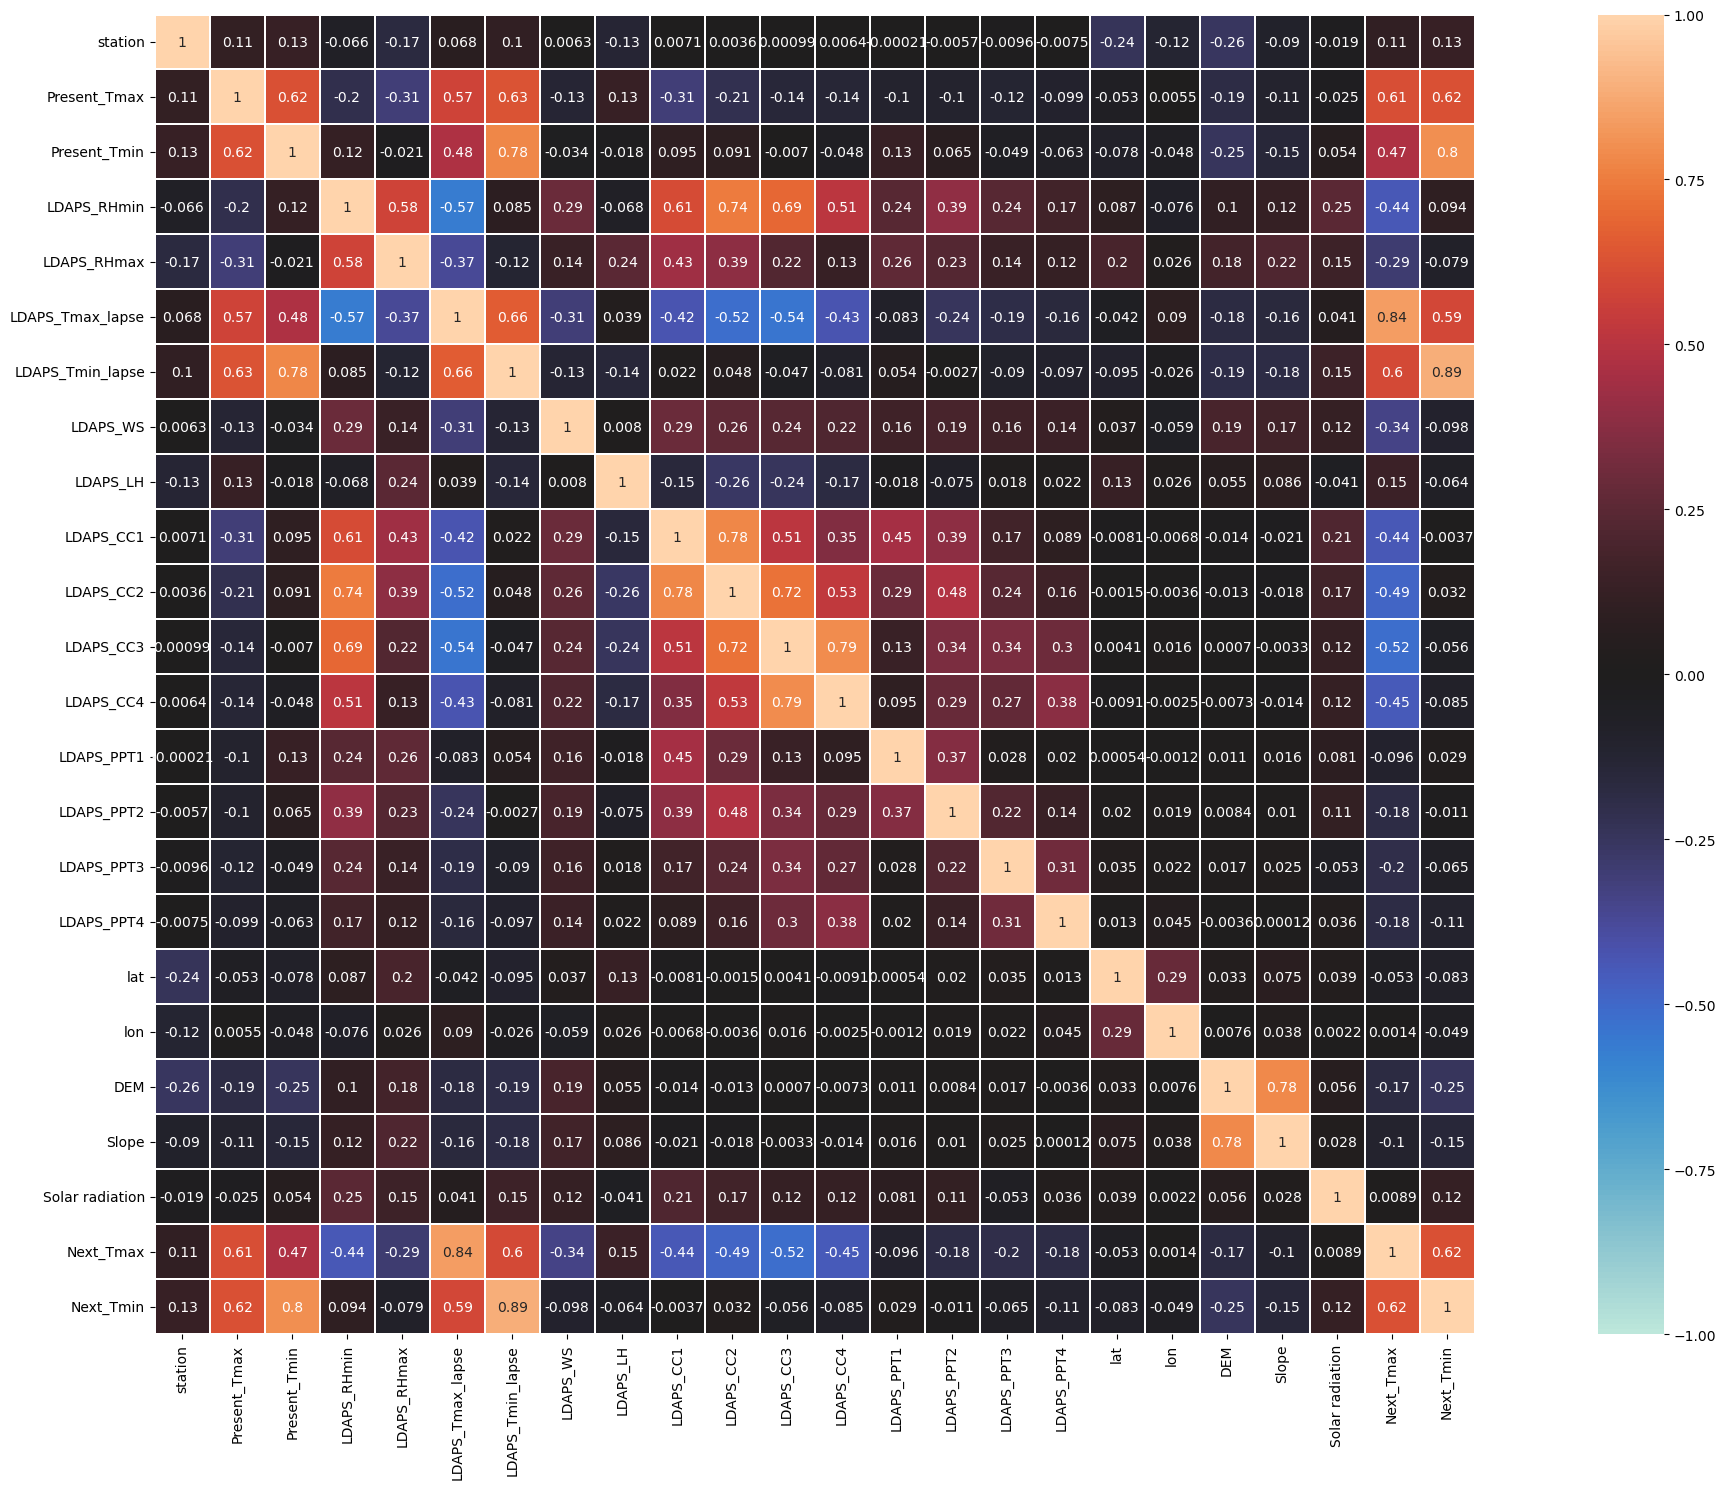

In [70]:
#Visualizing the correlation
df1_corr = df1.corr()
plt.figure(figsize=(25,15))
sns.heatmap(temp_corr, vmin=-1, vmax=1, annot=True, square=True, center=0,fmt='.2g', linewidths = 0.1)
plt.tight_layout()

Observations:
1. positive correlation with target variables(Next_Tmax & Next_Tmin) are seen with:
i. present Tmax & Tmin
ii. also, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse

# spliting data into training and target set

In [72]:
# We have two targets - 'Next_Tmax', 'Next_Tmin'
X = df1.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y1 = df1['Next_Tmax']
y2 = df1['Next_Tmin']

Data normalization of both x_train and x_test of dataset

In [73]:
#normalise the dataset using normalizer
def normalizer(x_train, x_test):
    scaler = Normalizer()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    return x_train, x_test

Remarks:
It applies Min-Max scaling to x_train and x_test using the fit_transform method of the MinMaxScaler object. This method scales the data such that the minimum value in the data becomes 0, the maximum value becomes 1, and all other values are scaled proportionally within this range.

In [74]:
# performing Min-Max scaling on two sets of data
def minmax(x_train, x_test):
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    return x_train, x_test

Remarks:
The purpose of this function is to ensure that the data in x_train and x_test are on a similar scale, which can be important for the machine learning algorithms. The application of the same normalization to both sets, it helps to maintain consistency between the training and testing data.

In [75]:
#performing stdscaler scaling on two sets of data
def stdscaler(x_train, x_test):
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    return x_train, x_test

# Exploring some models to evaluate the machine learning and visualize their predictions. 

In [76]:
def best_model(X, y, scaler, algo):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)

    X_train, X_test = scaler(X_train, X_test)

    model = algo()

    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    mae = mean_absolute_error(predictions, y_test)
    mse = mean_squared_error(predictions, y_test)

    print(f'The MAE is {mean_absolute_error(predictions, y_test)}')
    print(f'The MSE is {mean_squared_error(predictions, y_test)}')

    fig = px.scatter(x=predictions, y=y_test, template='plotly_dark', title=f'Actual Productivity vs Predictions')
    fig.update_traces(hovertemplate='Predicted Value : %{x} <br> Actual Value: %{y}')
    fig.update_layout(hoverlabel=dict(
        font_size = 20,
        bgcolor = 'white', 
        font_family = 'Helvetica'
    ))
    fig.update_xaxes(title='Predicted Values', showgrid=False)
    fig.update_yaxes(title='Actual Values', showgrid=False)

    return predictions, y_test, mse, mae, fig.show()

In [77]:
target_list = [y1, y2]

algos_list = [LinearRegression, KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor, SVR]

list_of_MAE = []
list_of_MSE = []

for i in algos_list:
    print(f"{i}")
    pred, y_test, mse, mae, plot = best_model(X, y1, normalizer, i)
    list_of_MSE.append(mse)
    list_of_MAE.append(mae)

<class 'sklearn.linear_model._base.LinearRegression'>
The MAE is 1.1175945606346238
The MSE is 2.1319875620642317


<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
The MAE is 1.4822910216718266
The MSE is 3.795831166150671


<class 'sklearn.tree._classes.DecisionTreeRegressor'>
The MAE is 0.9907636738906088
The MSE is 2.0871362229102166


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
The MAE is 0.6723188854489158
The MSE is 0.821496355005159


<class 'sklearn.svm._classes.SVR'>
The MAE is 2.522360567974417
The MSE is 9.720752259578154


In [79]:
msemae_y1 = pd.DataFrame()
msemae_y1['Algos'] =  ['LinearRegression', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'SVR']
msemae_y1['MSE_normalizer'] = list_of_MSE
msemae_y1['MAE_normalizer'] = list_of_MAE 
msemae_y1.head()

Algos  MSE_normalizer  MAE_normalizer
0       LinearRegression        2.131988        1.117595
1    KNeighborsRegressor        3.795831        1.482291
2  DecisionTreeRegressor        2.087136        0.990764
3  RandomForestRegressor        0.821496        0.672319
4                    SVR        9.720752        2.522361

In [80]:
MAE1 = []
MSE1 = []

for i in algos_list:
    print(f"{i}")
    pred, y_test, mse, mae, plot = best_model(X, y1, stdscaler, i)
    MSE1.append(mse)
    MAE1.append(mae)

<class 'sklearn.linear_model._base.LinearRegression'>
The MAE is 1.0970170317889063
The MSE is 2.0843736078706185


<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
The MAE is 0.7523323013415892
The MSE is 1.0820959752321984


<class 'sklearn.tree._classes.DecisionTreeRegressor'>
The MAE is 1.1014963880288957
The MSE is 2.3841021671826623


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
The MAE is 0.7372342621259032
The MSE is 0.9358326594427249


<class 'sklearn.svm._classes.SVR'>
The MAE is 0.7829606229274795
The MSE is 1.1956732943884107


In [85]:
msemae_y1['MSE_stdscaler'] = MSE1
msemae_y1['MAE_stdscaler'] = MAE1

In [101]:
MAE2 = []
MSE2 = []

for i in algos_list:
    print(f"{i}")
    pred, y_test, mse, mae, plot = best_model(X, y1, minmax, i)
    MSE2.append(mse)
    MAE2.append(mae)

<class 'sklearn.linear_model._base.LinearRegression'>
The MAE is 1.143870014962603
The MSE is 2.2351412177962784


<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
The MAE is 0.792311661506708
The MSE is 1.2172617131062953


<class 'sklearn.tree._classes.DecisionTreeRegressor'>
The MAE is 1.2630546955624355
The MSE is 3.0834468524251806


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
The MAE is 0.8502177502579966
The MSE is 1.2749822187822477


<class 'sklearn.svm._classes.SVR'>
The MAE is 0.915357510404084
The MSE is 1.5471720473143318


In [90]:
msemae_y1['MSE_minmax'] = MSE2
msemae_y1['MAE_minmax'] = MAE2 
msemae_y1.head()

Algos  MSE_normalizer  MAE_normalizer  MSE_stdscaler  \
0       LinearRegression        2.131988        1.117595       2.084374   
1    KNeighborsRegressor        3.795831        1.482291       1.082096   
2  DecisionTreeRegressor        2.087136        0.990764       2.384102   
3  RandomForestRegressor        0.821496        0.672319       0.935833   
4                    SVR        9.720752        2.522361       1.195673   

   MAE_stdscaler  MSE_minmax  MAE_minmax  
0       1.097017    2.235141    1.143870  
1       0.752332    1.217262    0.792312  
2       1.101496    2.988467    1.244324  
3       0.737234    1.275406    0.849998  
4       0.782961    1.547172    0.915358

In [102]:
algos_list = [LinearRegression, KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor, SVR]

MAE3 = []
MSE3 = []

for i in algos_list:
    print(f"{i}")
    pred, y_test, mse, mae, plot = best_model(X, y2, normalizer, i)
    MSE3.append(mse)
    MAE3.append(mae)

<class 'sklearn.linear_model._base.LinearRegression'>
The MAE is 0.780164507266571
The MSE is 0.9940440196667035


<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
The MAE is 1.1753869969040247
The MSE is 2.347765737874097


<class 'sklearn.tree._classes.DecisionTreeRegressor'>
The MAE is 0.8006191950464397
The MSE is 1.2109597523219815


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
The MAE is 0.5683467492260061
The MSE is 0.5858232229102166


<class 'sklearn.svm._classes.SVR'>
The MAE is 1.9154435876629745
The MSE is 5.960044221705082


In [92]:
msemae_y2 = pd.DataFrame()
msemae_y2['Algos'] =  ['LinearRegression', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'SVR']
msemae_y2['MSE_normalizer'] = MSE3
msemae_y2['MAE_normalizer'] = MAE3

In [93]:
MAE4 = []
MSE4 = []

for i in algos_list:
    print(f"{i}")
    pred, y_test, mse, mae, plot = best_model(X, y2, stdscaler, i)
    MSE4.append(mse)
    MAE4.append(mae)

<class 'sklearn.linear_model._base.LinearRegression'>
The MAE is 0.7703010730124422
The MSE is 0.9829761347963345


<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
The MAE is 0.6397729618163053
The MSE is 0.751797729618163


<class 'sklearn.tree._classes.DecisionTreeRegressor'>
The MAE is 0.8939112487100104
The MSE is 1.5364293085655316


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
The MAE is 0.5913199174406603
The MSE is 0.6181489638802886


<class 'sklearn.svm._classes.SVR'>
The MAE is 0.5660214551923516
The MSE is 0.6318157255525395


In [94]:
msemae_y2['MSE_stdscaler'] = MSE4
msemae_y2['MAE_stdscaler'] = MAE4

In [96]:
MAE5 = []
MSE5 = []

for i in algos_list:
    print(f"{i}")
    pred, y_test, mse, mae, plot = best_model(X, y2, minmax, i)
    MSE5.append(mse)
    MAE5.append(mae)

<class 'sklearn.linear_model._base.LinearRegression'>
The MAE is 0.776634159802409
The MSE is 1.0160595561265986


<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
The MAE is 0.6687306501547987
The MSE is 0.8261036119711043


<class 'sklearn.tree._classes.DecisionTreeRegressor'>
The MAE is 0.8671310629514963
The MSE is 1.401687306501548


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
The MAE is 0.5821996904024767
The MSE is 0.6069361388028895


<class 'sklearn.svm._classes.SVR'>
The MAE is 0.6474078183812495
The MSE is 0.7689683871006324


In [98]:
msemae_y2['MSE_minmax'] = MSE5
msemae_y2['MAE_minmax'] = MAE5
msemae_y2.head()

Algos  MSE_normalizer  MAE_normalizer  MSE_stdscaler  \
0       LinearRegression        0.994044        0.780165       0.982976   
1    KNeighborsRegressor        2.347766        1.175387       0.751798   
2  DecisionTreeRegressor        1.186146        0.794685       1.536429   
3  RandomForestRegressor        0.578817        0.567417       0.618149   
4                    SVR        5.960044        1.915444       0.631816   

   MAE_stdscaler  MSE_minmax  MAE_minmax  
0       0.770301    1.016060    0.776634  
1       0.639773    0.826104    0.668731  
2       0.893911    1.401687    0.867131  
3       0.591320    0.606936    0.582200  
4       0.566021    0.768968    0.647408

Comments:
Mean Squared Error (MSE) and Mean Absolute Error (MAE) metrics for different machine learning algorithms applied to the same dataset with three different data scaling techniques: Normalization, Standardization (StandardScaler), and Min-Max Scaling (MinMaxScaler).

1. MSE and MAE are used to measure prediction accuracy. Lower values of MSE and MAE are generally better, indicating more accurate predictions.
2. Different algorithms may be sensitive to different scaling methods. For instance, SVR shows a drastic reduction in both MSE and MAE when using StandardScaler compared to Normalization or Min-Max Scaling.
3. "RandomForestRegressor" seems to have the lowest MSE and MAE for all scaling methods, suggesting that it might be the most suitable algorithm for this dataset.

In [99]:
fig = px.bar(msemae_y2,  x='Algos', y=['MSE_normalizer', 'MAE_normalizer', 'MSE_stdscaler', 'MAE_stdscaler', 'MSE_minmax', 'MAE_minmax'], barmode='group')
fig.update_layout(title='MAE and MSE values of Algorithms on the Next Min Temperature', template='plotly_dark', hoverlabel=dict(
    font_size=20,
    font_family='Arial'
))
fig.update_traces(hovertemplate='%{x} : %{y}')
fig.show()

In [100]:
fig = px.bar(msemae_y1,  x='Algos', y=['MSE_normalizer', 'MAE_normalizer', 'MSE_stdscaler', 'MAE_stdscaler', 'MSE_minmax', 'MAE_minmax'], barmode='group')
fig.update_layout(title='MAE and MSE values of different Algorithms on the Next Max Temperature', template='plotly_dark', hoverlabel=dict(
    font_size=20,
    font_family='Arial'
))
fig.update_traces(hovertemplate='%{x} : %{y}')
fig.show()

# Conclusion:

It can be summarises that analysis and visulaization of the models provide valuable information about the performance of different machine learning algorithms used with different data scaling methods. 

Model Evaluation: with consideration and the aim of forecasting the temperature using best machine learning model, Lower MSE and MAE values are used and this provided RandomForestRegressor as the lead.